In [3]:
from __future__ import division
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.maps as maps
from collections import defaultdict
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.4)
import healpy as hp
import pickle
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


In [35]:
def getDepthAndArea(runName, year):
    directory = '/global/cscratch1/sd/husni/OpsimRuns/'
    nights = year*365 + 1
    opsdb = db.OpsimDatabase(directory+runName+'.db')
    outDir = 'temp'
    resultsDb = db.ResultsDb(outDir=outDir)
    nside = 256
    myBundles = {}
    if runName in list(proposalDict.keys()):
        sqlconstraint = 'filter = "i" and night < '+str(nights)+' and proposalId = '+str(proposalDict[runName])
    else: 
        sqlconstraint = 'filter = "i" and night < '+str(nights)
    if runName is 'pontus_2502':
        sqlconstraint = 'filter = "i" and night < '+str(nights)+' and proposalId != '+str(proposalDict[runName])
    metric = metrics.ExgalM5(lsstFilter='i')
    dustMap = maps.DustMap(interp=False, nside=nside)
    stackerList = []
    slicer = slicers.HealpixSlicer(nside=nside, useCache=False)

    myBundles['field dither'] = metricBundles.MetricBundle(metric, slicer, constraint=sqlconstraint, 
                                                           stackerList=stackerList, runName=runName,
                                                           metadata='field dither', mapsList=[dustMap])
    bgroup = metricBundles.MetricBundleGroup(myBundles, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll() 
    bundle = myBundles['field dither']
    
    vminDict = {1:np.linspace(24,25.5,16), 3:np.linspace(24.5,26,16), 6:np.linspace(25,26.5,16), 10:np.linspace(25.5,27,16)}
    result = []
    for vmin in vminDict[year]:
        depth_cut = vmin
        cond = np.logical_and.reduce((bundle.slicer.getSlicePoints()['ebv']<0.2, bundle.metricValues.mask==False, bundle.metricValues.data>vmin, bundle.metricValues.data<28))
        depths = bundle.metricValues[cond]
        area = len(bundle.metricValues[cond])*hp.pixelfunc.nside2pixarea(nside=nside, degrees=True)
        median_depth = np.median(depths)
        width = np.std(depths)
        result.append((depth_cut, area, median_depth, width))
    return result

In [61]:
for year in [1,3,6,10]:
    runName = 'altsched_rolling_riswap'
    outname =  runName+'_area_depth_y'+str(year)+'.npy'
    result = getPositions(runName, year)
    np.save('newcutnpys/'+outname, result)

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and night < 366 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 58075 visits
Running:  ['field dither']


/global/common/software/lsst/cori-haswell-gcc/stack/w.2018.19_sim2.8.0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:446: RuntimeWarning:

invalid value encountered in equal



Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning:

invalid value encountered in greater

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning:

invalid value encountered in less

/global/homes/h/husni/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:688: UserWarning:




Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and night < 1096 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 168654 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and night < 2191 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 341493 visits
Running:  ['field dither']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Querying database SummaryAllProps with constraint filter = "i" and night < 3651 for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 567306 visits
Running:  ['field dither']
Completed metric generation.
Running reduce m

/global/homes/h/husni/.local/lib/python3.6/site-packages/numpy/core/numeric.py:553: UserWarning:




In [22]:
proposalDict = {'baseline2018a':3, 'colossus_2664':2, 'colossus_2665':1, 'colossus_2667':1,
                'kraken_2026':3, 'kraken_2035':3, 'kraken_2036':3, 'kraken_2042':2, 'kraken_2044':1,
                'mothra_2045':1, 'nexus_2097':1, 'pontus_2002':1, 'pontus_2489':3, 'pontus_2502':2,
                'mothra_2049':1}

In [11]:
a = list(bundle.metricValues[cond])

In [44]:
x1,x2,x3,x4,y1,y2,y3,y4,t1,t2,t3,t4,c1,c2,c3,c4,s1,s2,s3,s4 = [[] for _ in range(20)]
for i,cut_result in enumerate(np.load('newcutnpys/altsched_riswap_area_depth_y1.npy')[:-5]):
    x1.append([cut_result[1]])
    y1.append([cut_result[2]])
    t1.append(str(cut_result[0]))
    c1.append(120+5*i)
    s1.append(cut_result[3]*1e2)


for i,cut_result in enumerate(np.load('newcutnpys/altsched_riswap_area_depth_y10.npy')[:-5]):
    x2.append([cut_result[1]])
    y2.append([cut_result[2]])
    t2.append(str(cut_result[0]))
    c2.append(120-5*i)
    s2.append(cut_result[3]*1e2)

updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([
            dict(label = 'Year 1',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Year 1'}]),
            dict(label = 'Year 10',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Year 10'}])
        ]),
    )
])


data = [
        {
        'x': x1,
        'y': y1,
        'mode': 'markers',
        'text':t1,
        'name':'baseline2018a',
        'marker': {
            'color': c1,
            'size': s1,
            'colorscale' : 'viridis'}
    }, 
    
        {
        'x': x2,
        'y': y2,
        'mode': 'markers',
        'text': t2,
        'name':'pontus_2002',
        'marker': {
            'color': c2,
            'size': s2,
            'colorscale' : 'Greys'}
    }, 
    
]

layout = go.Layout(
    xaxis=dict(
        title='area (degrees)',
        gridcolor='rgb(255, 255, 255)',
        #type='log',
        zerolinewidth=1,
    ),
    yaxis=dict(
        title='median i-band co-added depth',
        gridcolor='rgb(255, 255, 255)',
        #range=[36.12621671352166, 91.72921793264332],
        zerolinewidth=1,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    updatemenus=updatemenus
)


py.iplot(dict(data=data, layout=layout))

In [126]:
x1,x2,x3,x4,y1,y2,y3,y4,t1,t2,t3,t4,c1,c2,c3,c4,s1,s2,s3,s4 = [[] for _ in range(24)]
for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y1.npy')):
    x1.append([cut_result[1]])
    y1.append([cut_result[2]])
    t1.append(str(cut_result[0]))
    c1.append(120+5*i)
    s1.append(cut_result[3]*1e2)


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y1.npy')):
    x2.append([cut_result[1]])
    y2.append([cut_result[2]])
    t2.append(str(cut_result[0]))
    c2.append(120-5*i)
    s2.append(cut_result[3]*1e2)

for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y10.npy')):
    x3.append([cut_result[1]])
    y3.append([cut_result[2]])
    t3.append(str(cut_result[0]))
    c3.append(120+5*i)
    s3.append(cut_result[3]*1e2)


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y10.npy')):
    x4.append([cut_result[1]])
    y4.append([cut_result[2]])
    t4.append(str(cut_result[0]))
    c4.append(120-5*i)
    s4.append(cut_result[3]*1e2)

updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([
            dict(label = 'Year 1',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Year 1'}]),
            dict(label = 'Year 10',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Year 10'}])
        ]),
    )
])


data = [
        {
        'x': x1,
        'y': y1,
        'mode': 'markers',
        'text':t1,
        'name':'baseline2018a',
        'marker': {
            'color': c1,
            'size': s1,
            'colorscale' : 'viridis'}
    }, 
    
        {
        'x': x2,
        'y': y2,
        'mode': 'markers',
        'text': t2,
        'name':'pontus_2002',
        'marker': {
            'color': c2,
            'size': s2,
            'colorscale' : 'Greys'}
    }, 
        {
        'x': x3,
        'y': y3,
        'mode': 'markers',
        'text': t3,
        'name':'baseline2018a',
        'marker': {
            'color': c3,
            'size': s3,
            'colorscale' : 'viridis'}
    }, 
        {
        'x': x4,
        'y': y4,
        'mode': 'markers',
        'text': t4,
        'name':'pontus_2002',
        'marker': {
            'color': c4,
            'size': s4,
            'colorscale' : 'Greys'}
    }, 
    
]

layout = go.Layout(
    xaxis=dict(
        title='area (degrees)',
        gridcolor='rgb(255, 255, 255)',
        #type='log',
        zerolinewidth=1,
        #ticklen=5,
        #gridwidth=2,
    ),
    yaxis=dict(
        title='median i-band co-added depth',
        gridcolor='rgb(255, 255, 255)',
        #range=[36.12621671352166, 91.72921793264332],
        zerolinewidth=1,
        #ticklen=5,
        #gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    updatemenus=updatemenus
)


py.iplot(dict(data=data, layout=layout))

In [50]:
x1,x2,x3,x4,y1,y2,y3,y4,t1,t2,t3,t4,c1,c2,c3,c4,s1,s2,s3,s4,z1,z2,z3,z4 = [[] for _ in range(24)]
for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y1.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x1.append([area])
    y1.append([idepth])
    t1.append('i-depth > '+str(cut_result[0])+'<br>'+' neff*area = '+str(neff*area) )
    c1.append(120+5*neff)
    s1.append(cut_result[3]*1e2)


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y1.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x2.append([area])
    y2.append([idepth])
    t2.append('i-depth > '+str(cut_result[0])+'<br>'+' neff*area = '+str(neff*area) )
    c2.append(120-5*neff+100)
    s2.append(cut_result[3]*1e2)

for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y10.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x3.append([area])
    y3.append([idepth])
    t3.append('i-depth > '+str(cut_result[0])+'<br>'+' neff*area = '+str(neff*area) )
    c3.append(120+5*neff)
    s3.append(cut_result[3]*1e2)


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y10.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x4.append([area])
    y4.append([idepth])
    t4.append('i-depth > '+str(cut_result[0])+'<br>'+' neff*area = '+str(neff*area) )
    c4.append(120-5*neff)
    s4.append(cut_result[3]*1e2)
data = [
        {
        'x': x1,
        'y': y1,
        'mode': 'markers',
        'text':t1,
        'name':'baseline2018a',
        'marker': {
            'color': c1,
            'size': s1,
            'colorscale' : 'viridis'}
    }, 
    
        {
        'x': x2,
        'y': y2,
        'mode': 'markers',
        'text': t2,
        'name':'pontus_2002',
        'marker': {
            'color': c2,
            'size': s2,
            'colorscale' : 'Greys'}
    }, 
        {
        'x': x3,
        'y': y3,
        'mode': 'markers',
        'text': t3,
        'name':'baseline2018a',
        'marker': {
            'color': c3,
            'size': s3,
            'colorscale' : 'viridis'}
    }, 
        {
        'x': x4,
        'y': y4,
        'mode': 'markers',
        'text': t4,
        'name':'pontus_2002',
        'marker': {
            'color': c4,
            'size': s4,
            'colorscale' : 'Greys'}
    }, 
    
]
    
updatemenus = list([
    dict(active=0,
         showactive=True,
         buttons=list([
            dict(label = 'Year 1',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Year 1'}]),
            dict(label = 'Year 10',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Year 10'}])
        ]),
    )
])

py.iplot(dict(data=data, layout=layout))

In [51]:
x1,x2,x3,x4,y1,y2,y3,y4,t1,t2,t3,t4,c1,c2,c3,c4,s1,s2,s3,s4,z1,z2,z3,z4 = [[] for _ in range(24)]
for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y1.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x1.append([area])
    y1.append([idepth])
    t1.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c1.append(120+5*neff*area)
    s1.append(cut_result[3]*1e2)


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y1.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x2.append([area])
    y2.append([idepth])
    t2.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c2.append(120-5*neff*area+100)
    s2.append(cut_result[3]*1e2)

for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y10.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x3.append([area])
    y3.append([idepth])
    t3.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c3.append(120+5*neff*area)
    s3.append(cut_result[3]*1e2)


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y10.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x4.append([area])
    y4.append([idepth])
    t4.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c4.append(120-5*neff*area)
    s4.append(cut_result[3]*1e2)
data = [
        {
        'x': x1,
        'y': y1,
        'mode': 'markers',
        'text':t1,
        'name':'baseline2018a',
        'marker': {
            'color': c1,
            'size': s1,
            'colorscale' : 'viridis'}
    }, 
    
        {
        'x': x2,
        'y': y2,
        'mode': 'markers',
        'text': t2,
        'name':'pontus_2002',
        'marker': {
            'color': c2,
            'size': s2,
            'colorscale' : 'Greys'}
    }, 
        {
        'x': x3,
        'y': y3,
        'mode': 'markers',
        'text': t3,
        'name':'baseline2018a',
        'marker': {
            'color': c3,
            'size': s3,
            'colorscale' : 'viridis'}
    }, 
        {
        'x': x4,
        'y': y4,
        'mode': 'markers',
        'text': t4,
        'name':'pontus_2002',
        'marker': {
            'color': c4,
            'size': s4,
            'colorscale' : 'Greys'}
    }, 
    
]
    
updatemenus = list([
    dict(active=0,
         showactive=True,
         buttons=list([
            dict(label = 'Year 1',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Year 1'}]),
            dict(label = 'Year 10',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Year 10'}])
        ]),
    )
])

py.iplot(dict(data=data, layout=layout))

In [52]:
x1,x2,x3,x4,y1,y2,y3,y4,t1,t2,t3,t4,c1,c2,c3,c4,s1,s2,s3,s4,z1,z2,z3,z4 = [[] for _ in range(24)]
for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y1.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x1.append([area])
    y1.append([idepth])
    t1.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c1.append(120+5*i)
    s1.append(cut_result[3]*1e2)
    z1.append([neff*area])


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y1.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x2.append([area])
    y2.append([idepth])
    t2.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c2.append(120-5*i+100)
    s2.append(cut_result[3]*1e2)
    z2.append([neff*area])

for i,cut_result in enumerate(np.load('baseline2018a_area_depth_y10.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x3.append([area])
    y3.append([idepth])
    t3.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c3.append(120+5*i)
    s3.append(cut_result[3]*1e2)
    z3.append([neff*area])


for i,cut_result in enumerate(np.load('pontus_2002_area_depth_y10.npy')):
    area = cut_result[1]
    idepth = cut_result[2]
    neff = 4.33*(idepth-25)**2 + 7.03*(idepth-25) + 10.49
    x4.append([area])
    y4.append([idepth])
    t4.append('i-depth > '+str(cut_result[0])+'<br>'+' neff = '+str(neff) )
    c4.append(120-5*i)
    s4.append(cut_result[3]*1e2)
    z4.append([neff*area])

updatemenus = list([
    dict(active=0,
         showactive=True,
         buttons=list([
            dict(label = 'Year 1',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Year 1'}]),
            dict(label = 'Year 10',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Year 10'}])
        ]),
    )
])


data = [go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    text=t1,
    mode='markers',
    name='baseline2018a',
    marker=dict(
        sizemode = 'diameter',
        #sizeref = 750,
        size = s1*200,
        color = c1,
        colorscale = 'viridis',
        #colorbar = dict(title = 'Life<br>Expectancy'),
        #line=dict(color='rgb(140, 140, 170)')
    )
),
    go.Scatter3d(
        x=x2,
        y=y2,
        z=z2,
        text=t2,
        name='pontus_2002',
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            #sizeref = 750,
            size = s2*200,
            color = c2,
            colorscale = 'Greys',
            #colorbar = dict(title = 'Life<br>Expectancy'),
            #line=dict(color='rgb(140, 140, 170)')
    )
),
    go.Scatter3d(
        x=x3,
        y=y3,
        z=z3,
        text=t3,
        name='baseline2018a',
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            #sizeref = 750,
            size = s3*200,
            color = c3,
            colorscale = 'viridis',
            #colorbar = dict(title = 'Life<br>Expectancy'),
            #line=dict(color='rgb(140, 140, 170)')
    )
),
    go.Scatter3d(
        x=x4,
        y=y4,
        z=z4,
        text=t4,
        name='pontus_2002',
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            #sizeref = 750,
            size = s4*200,
            color = c4,
            colorscale = 'Greys',
            #colorbar = dict(title = 'Life<br>Expectancy'),
            #line=dict(color='rgb(140, 140, 170)')
    )
)
       ]


layout=go.Layout(
                 scene = dict(xaxis=dict(title='area (degrees^2)'),
                            yaxis=dict(title='median<br>depth<br> in i'),
                            zaxis=dict(title='area<br>*n_eff'),
                            bgcolor = 'rgb(243, 243, 243)'
                           ),
                 updatemenus = updatemenus
                )


py.iplot(dict(data=data, layout=layout))

In [5]:
a = [[1],[2,3],[],[3]]

In [9]:
list(a)

[[1], [2, 3], [], [3]]

In [59]:
url.url

In [1]:
ls

CCL_round_trip.ipynb
CSAB.py
CotB.pdf
GalSize.ipynb
Galsimtests.ipynb
HSCS16A_combinedarea_1000rea_full_xi_p.mean_sqrtvar
'Josh'\''s metric.ipynb'
ModelErrors.ipynb
ModelErrors.py
ModelErrorsNew.ipynb
'Peter'\''s Metric.ipynb'
__pycache__/
airmass.ipynb
area_mediandepth_relationship.ipynb
area_vs_depth.ipynb
counter10_Y10.p
counter1_Y10.p
counter3_Y10.p
counter6_Y10.p
dec_hist.ipynb
errors.ipynb
hsc_plots/
methodology.ipynb
'metrics playground.ipynb'
moon_visibility.ipynb
new_runs_results.ipynb
new_sims_metrics_comparison.ipynb
newcutnpys/
npys/
objs/
paper_plots.ipynb
plotDitherPatterns.ipynb
rho_requirements.txt
rolling.ipynb
'rotational angle distribution test.ipynb'
saveDitherPositions.ipynb
temp/
whyditherplot.ipynb


In [4]:
countersDict = pickle.load(open('counter10_Y10.p', 'rb'))

In [5]:
l = len(list(countersDict.keys()))

In [7]:
visibility = [[False]*i+[True]*(1)+[False]*(l-i-1) for i in range(l)]



updatemenus = list([dict(type="buttons",
                         active=-1,
                         buttons= [dict(label=key, 
                                        method='update', 
                                        args = [{'visibile': visibility[i]},
                                                {'title':key}] ) for i, key in enumerate(list(countersDict.keys()))])
    
])
              
layout = dict(updatemenus=updatemenus)
fig = ff.create_distplot([list((countersDict[x][x]).values()) for x in list(countersDict.keys())], [x for x in list(countersDict.keys())], bin_size=1, show_hist=False, show_rug=False)
#fig.layout['updatemenus']=updatemenus
py.iplot(fig)


In [50]:
from sklearn import linear_model



In [55]:
for year in ['1','3','6','10']:
    runName = 'newcutnpys/altsched_roriswap_area_depth_y'+year+'.npy'
    data = np.load(runName)[:-5]
    dataX = data[:,1]
    dataY = data[:,2]
    regr = linear_model.LinearRegression()
    regr.fit(dataX.reshape(-1, 1), dataY.reshape(-1, 1))
    print(year, regr.coef_[0][0], regr.intercept_[0])


1 -1.3397795822129898e-05 25.45030983950539
3 -1.1486114299810512e-05 26.000316529819436
6 -1.033632308585374e-05 26.372811080054035
10 -1.106722918437021e-05 26.660156319144793


In [60]:
data

array([2.60000000e+01, 1.52253113e+04, 2.64918450e+01, 1.37835600e-01])

In [63]:
for year in ['1','3','6','10']:
    runName = 'newcutnpys/altsched_riswap_area_depth_y'+year+'.npy'
    data = np.load(runName)[5]
    dataX = data[1]
    dataY = data[2]
    print(year, dataX, dataY)

1 15802.535487152802 25.238644560881347
3 15855.62081021241 25.818184410787907
6 15653.351041716518 26.21103877493674
10 15225.311282658822 26.491844988848314


In [53]:
def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i][0])
        
    return k
p1 = go.Scatter(x=dataX, 
                y=dataY, 
                mode='markers',
                name='data points',
                marker=dict(color='black', size=6)
               )

p2 = go.Scatter(x=dataX, 
                y=regr.predict(dataX.reshape(-1, 1)),
                mode='lines',
                name='linear fit',
                text='y = ' +str(regr.coef_[0][0]) + 'x + ' +str(regr.intercept_[0]),
                line=dict(color='violet', width=3)
                )

layout = go.Layout(xaxis=dict(title='area (degrees^2)',
                              zeroline=False),
                   yaxis=dict(title='median depth in i-band',
                              zeroline=False),
                   showlegend=False, hovermode='closest',
                   title='baseline2018a Y10 linear fit')

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)

In [80]:
data = np.load('baseline2018a_area_depth_y10.npy')
dataX = data[:,0]
dataY = data[:,1]



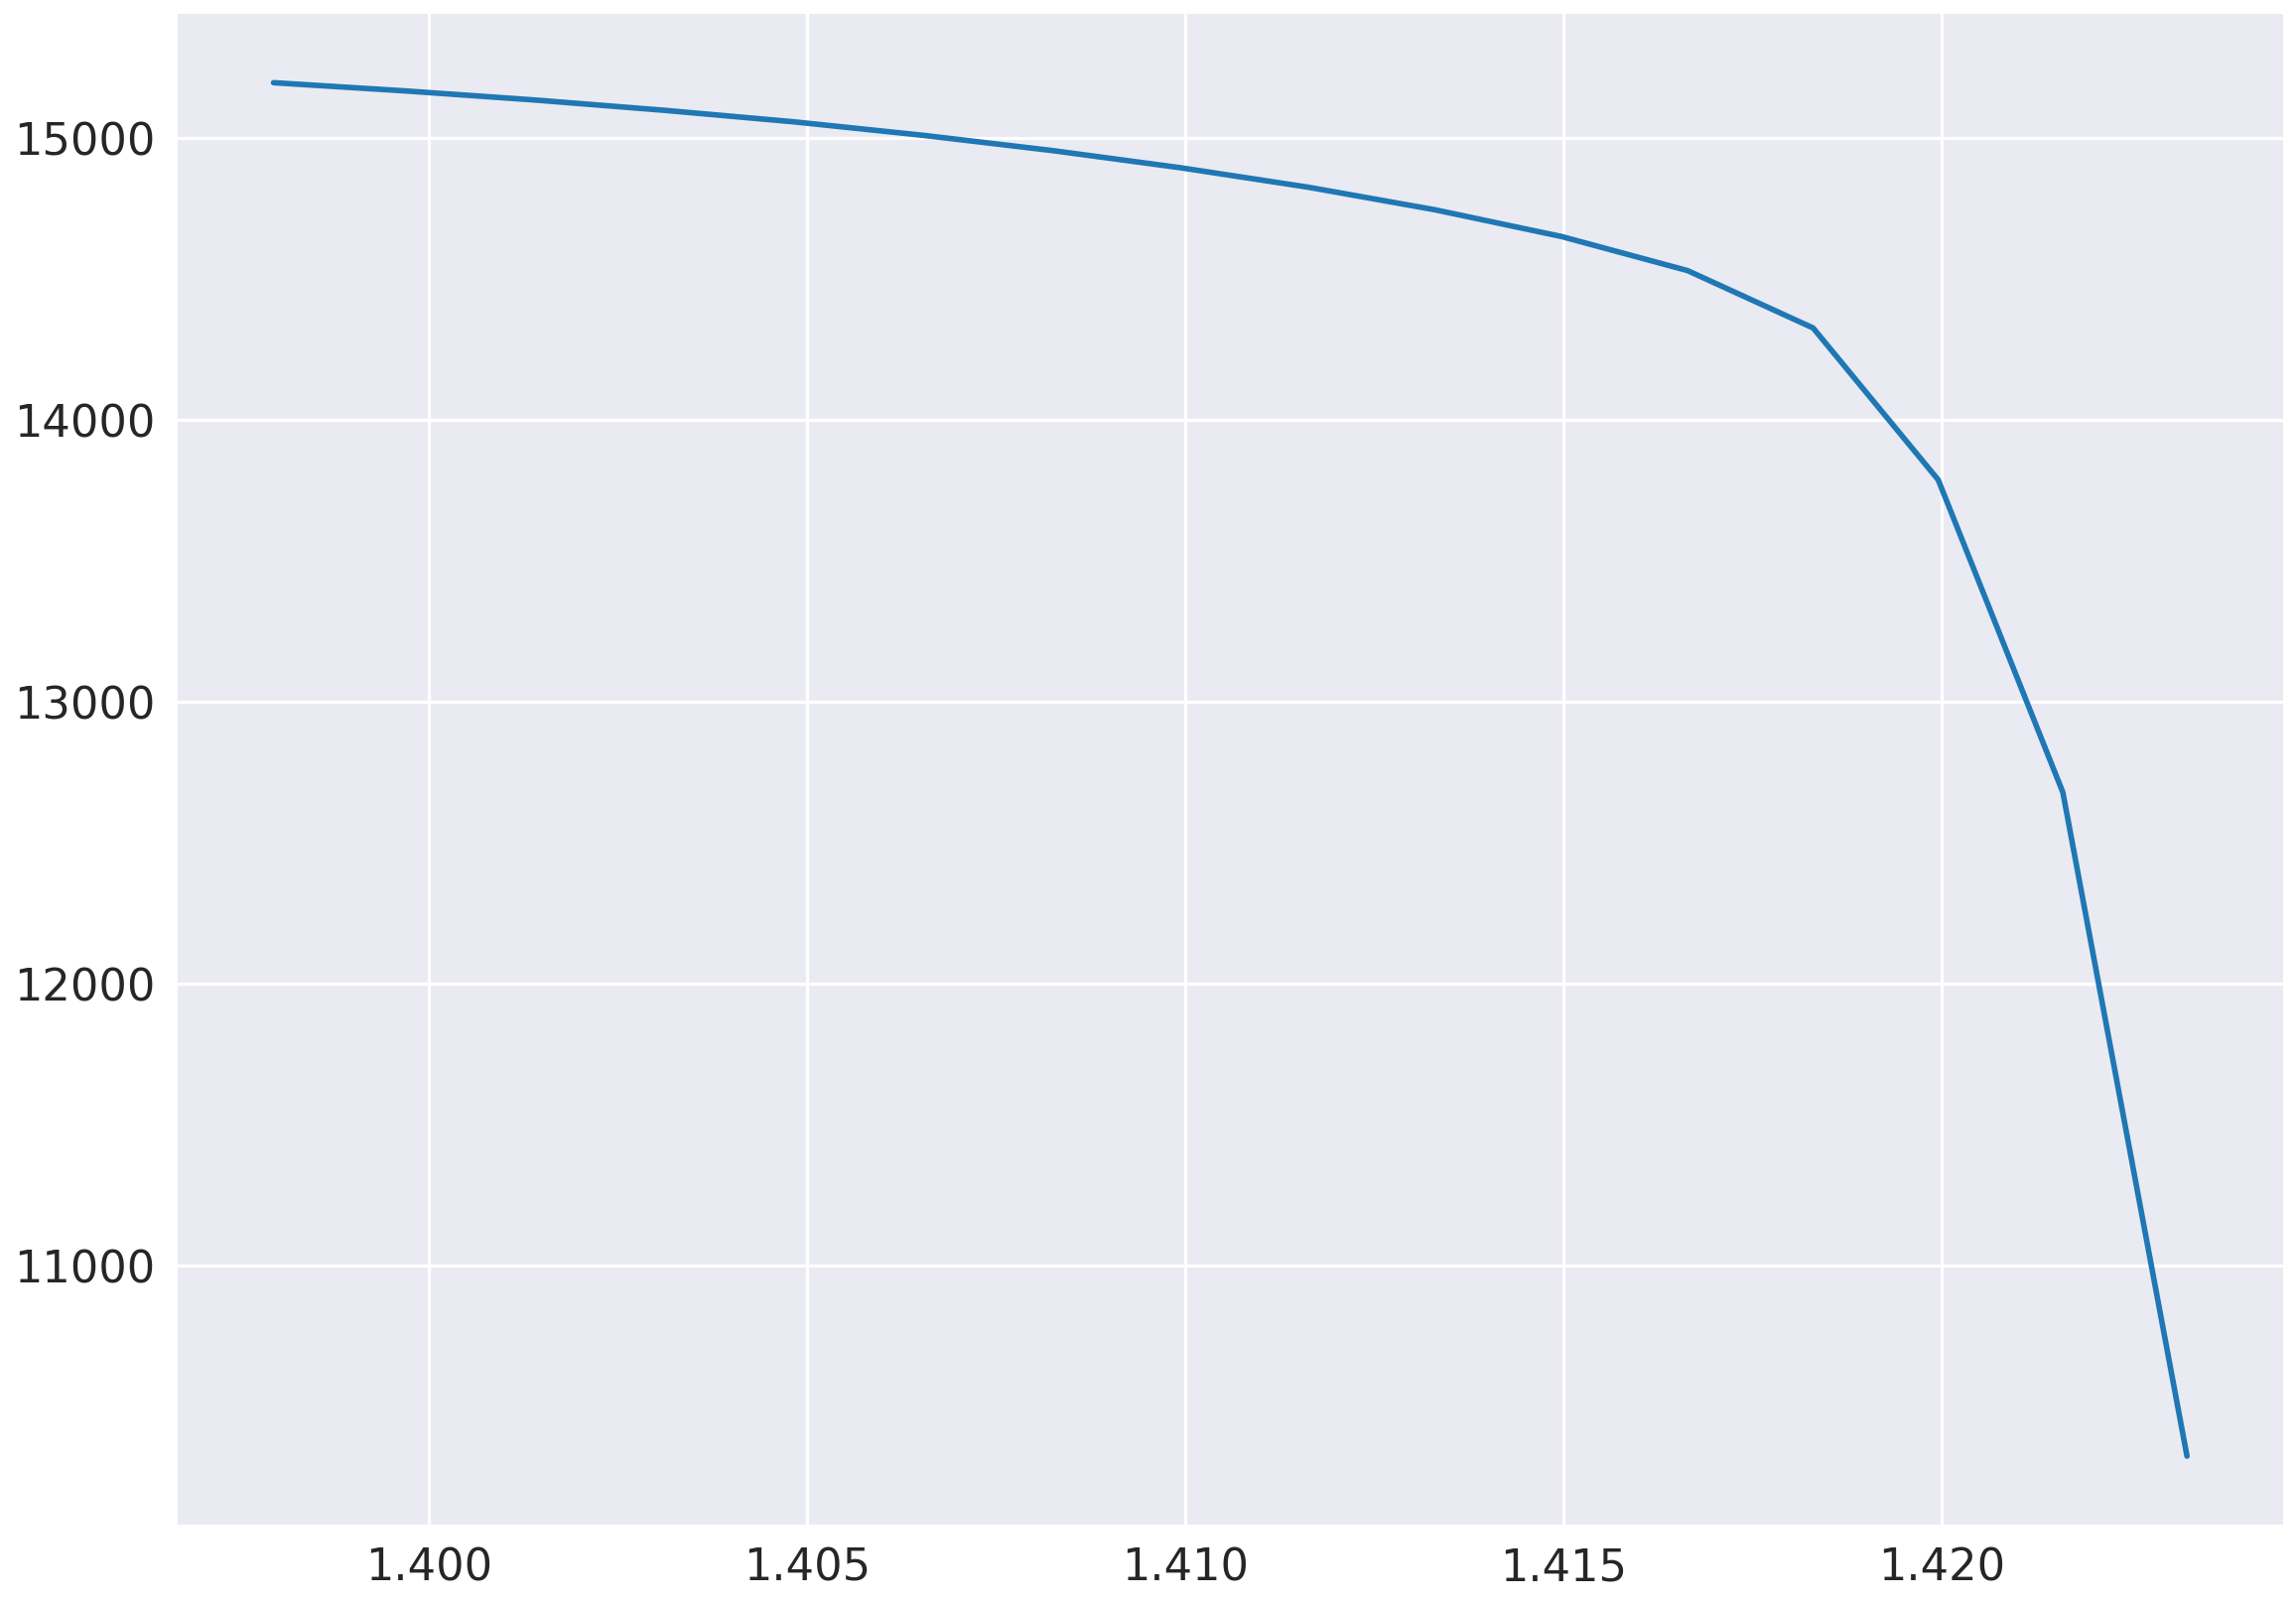

In [95]:
np.log10(data)

In [ ]:
plt.plot(np.exp(dataY-10000))

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning:

overflow encountered in exp



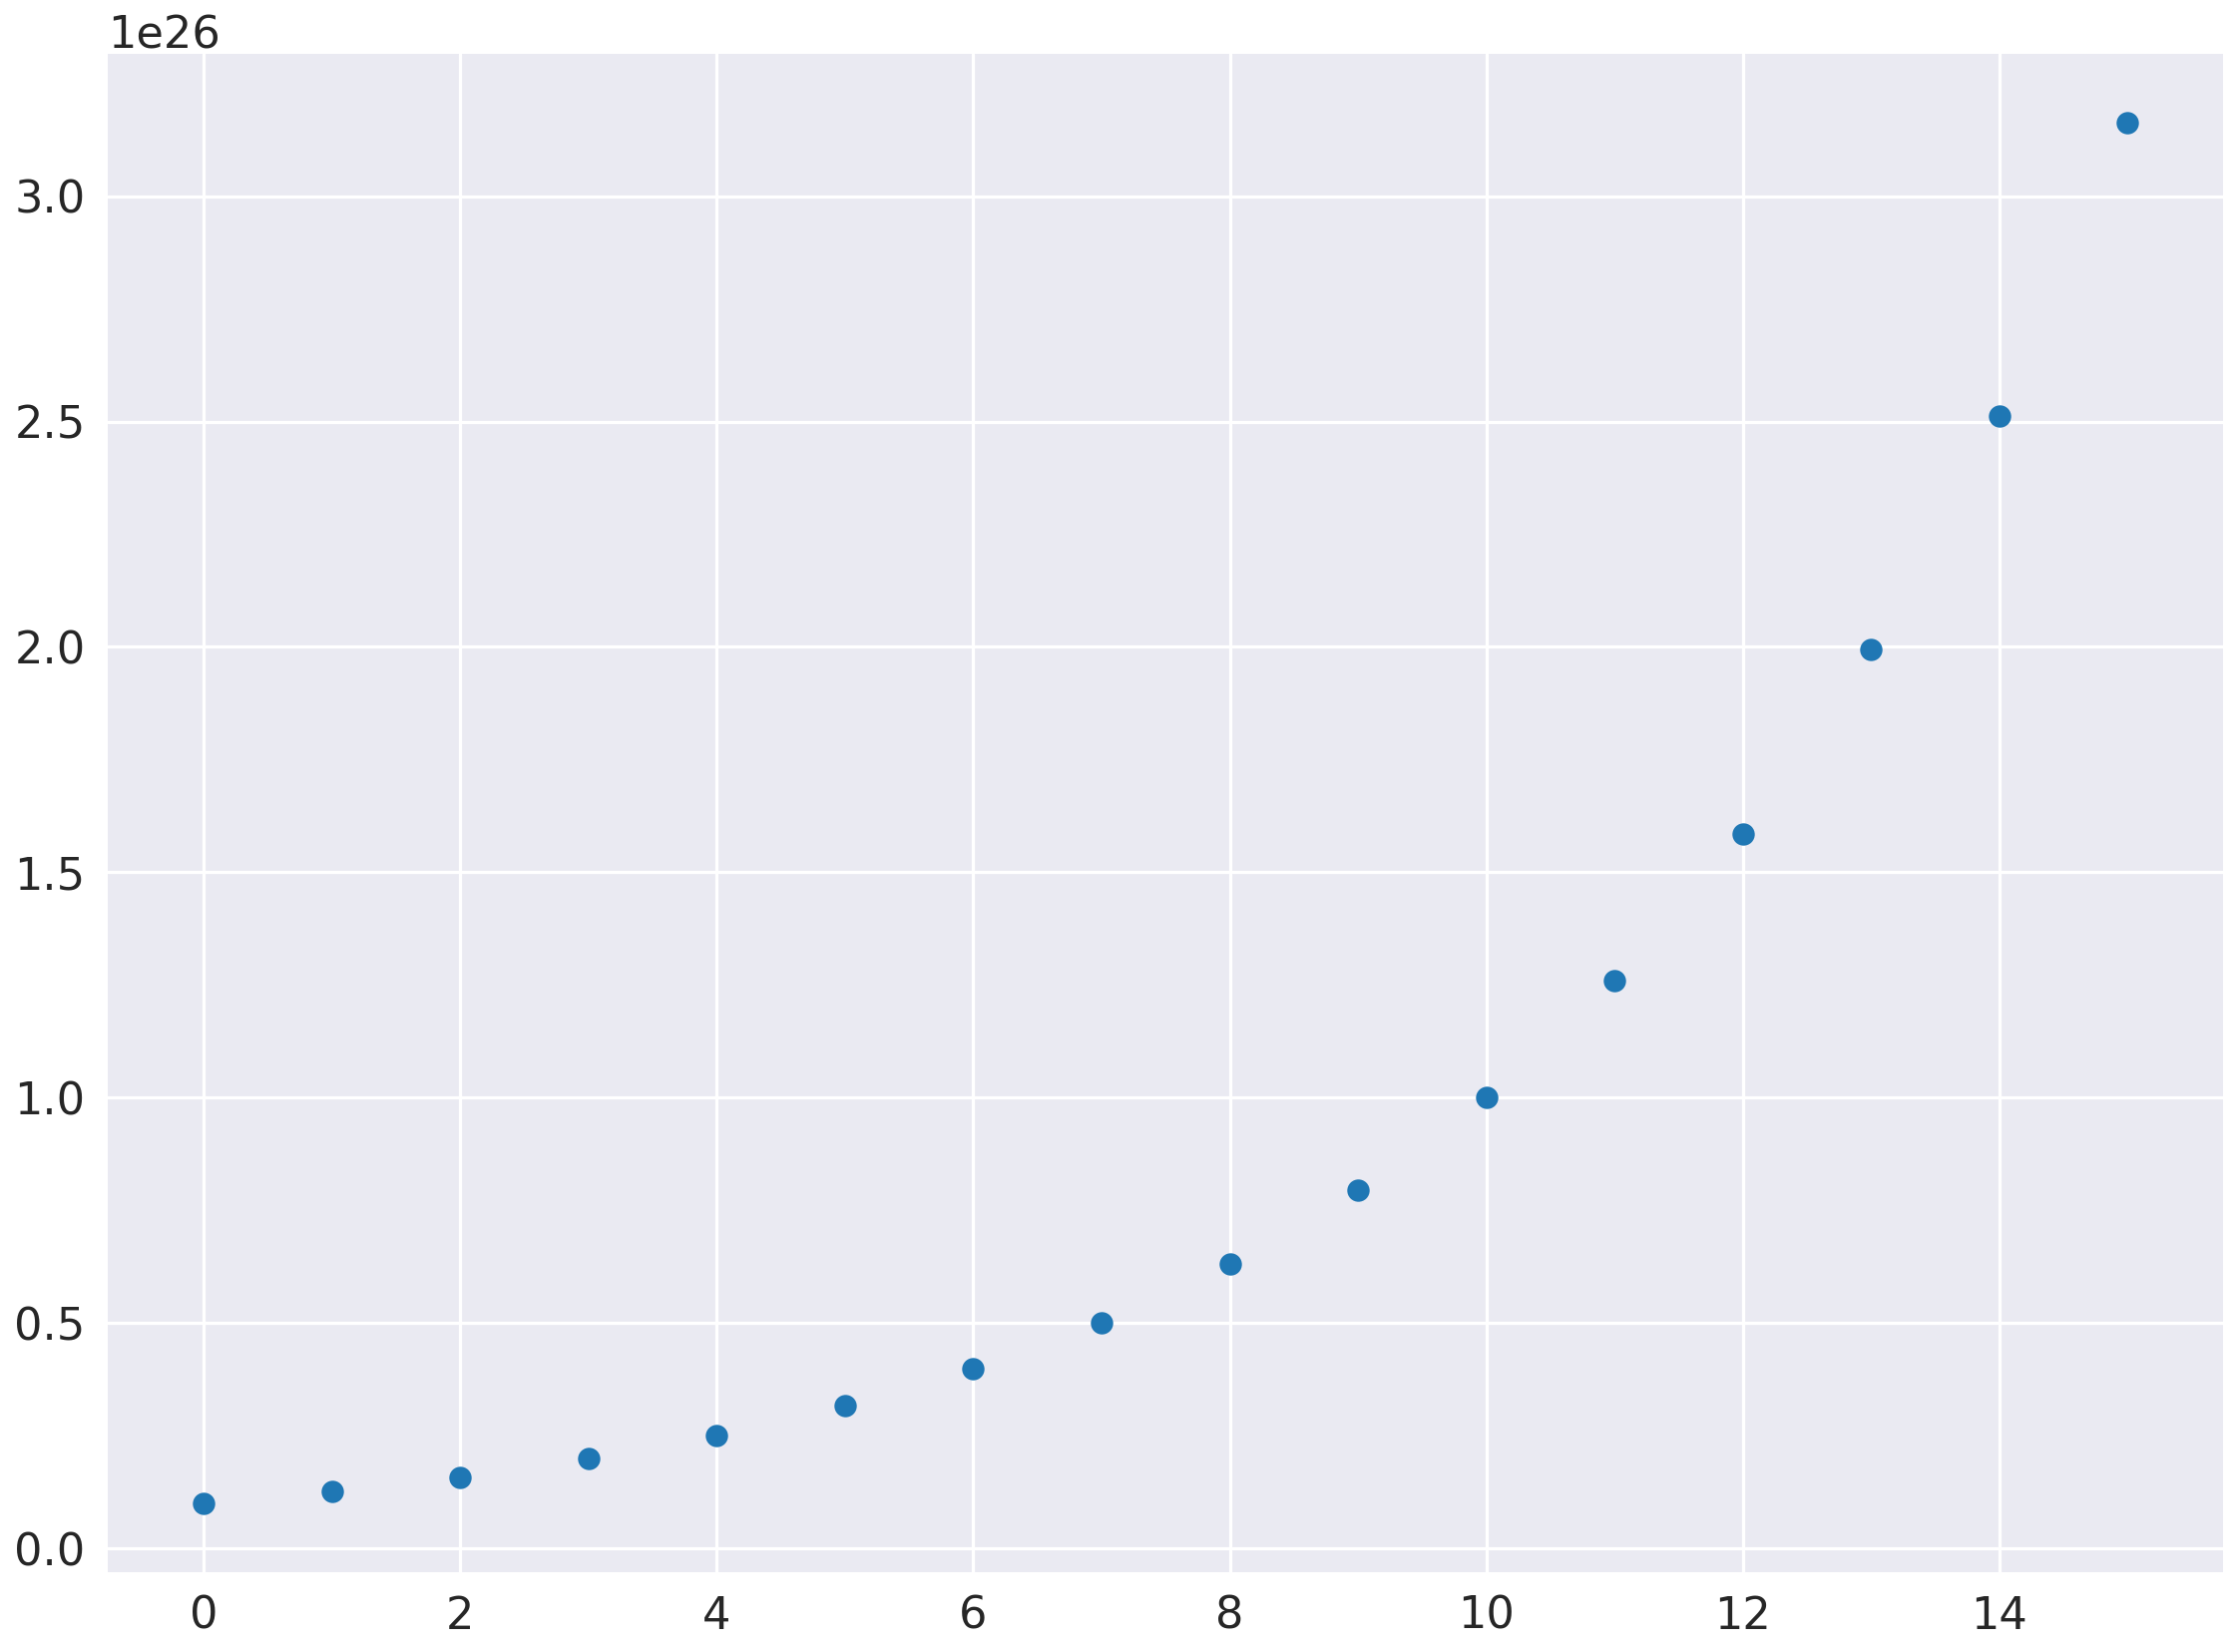

In [100]:
plt.plot(10**(dataX),'o')

In [ ]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dataX.reshape(-1, 1), dataY.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)


In [ ]:
def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i][0])
        
    return k
p1 = go.Scatter(x=dataX, 
                y=dataY, 
                mode='markers',
                name='data points',
                marker=dict(color='black', size=6)
               )

p2 = go.Scatter(x=dataX, 
                y=regr.predict(dataX.reshape(-1, 1)),
                mode='lines',
                name='linear fit',
                text='y = ' +str(regr.coef_[0][0]) + 'x + ' +str(regr.intercept_[0]),
                line=dict(color='violet', width=3)
                )

layout = go.Layout(xaxis=dict(title='area (degrees^2)',
                              zeroline=False),
                   yaxis=dict(title='median depth in i-band',
                              zeroline=False),
                   showlegend=False, hovermode='closest',
                   title='baseline2018a Y10 linear fit')

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)